In [1]:
"""
학습할 이미지의 경로를 지정한 부분 백엔드와의 연동이 아닌 단지 학습만을 위한 프로그램이기 때문에 절대 경로로 지정하였다.
"""
FOLDER_ROOT = 'C:/Users/kjh97/a/'
FOLDER_TRAIN = FOLDER_ROOT + 'train/'

In [2]:
"""
이미지 지도 학습에 필요한 라이브러리들을 import해준 부분 
"""
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
from PIL import Image
from imutils import paths
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

In [3]:
labels_dir = "C:/Users/kjh97/a/train"

In [4]:
labels = ["actiferin", "azella", "bearse", "colchine", "gentazole", "geworin", "habenherb", "penzalq", "tacenol"]

In [5]:
classes = len(labels)
image_w=28
image_h=28
pixels=image_h*image_w*3
X=[]
y=[]

In [ ]:
"""
1개의 라벨에 여러 개의 데이터가 있기 때문에 빈 리스트를 미리 선언한다.
for문을 이용하여 라벨을 초기화하고 첫 idx에 1을 놓는다.(라벨링 작업)
이미지를 RGB값으로 바꾸고 numpy에 담는다.
"""
for idx, cat in enumerate(labels):
    label = [0 for i in range(classes)]
    label[idx]=1
    
    image_dir = labels_dir+"/"+cat
    files = glob.glob(image_dir+"/*.png")
    print(cat, "파일 길이 :", len(files))
    
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        X.append(data)
        y.append(label)
        
        if i%700==0:
            print(cat, " : ", f)
X=np.array(X)
y=np.array(y)
len(X), len(y)


In [ ]:
"""
train세트와 test셋을 분리하고 데이터셋을 저장한다.
"""
X_train, X_test, y_train, y_test=train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("C:/Users/kjh97/a/dataset.npy",xy)
print("ok", len(y))

In [6]:
"""
학습을 위하여 저장된 데이터를 로드한다.
"""
X_train, X_test, y_train, y_test = np.load("C:/Users/kjh97/a/dataset.npy", allow_pickle=True)

In [7]:
X_train.shape

(9092, 28, 28, 3)

In [1]:
"""
원핫 인코딩을 통하여 0과 1사이의 값으로 초기화하여 학습한다.
"""
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

NameError: name 'X_train' is not defined

In [9]:
"""
학습모델의 코드로 convolution layer 1장과 dense layer 3장으로 구성하였다.
학습속도를 위하여 input되는 이미지의 크기는 28x28로 설정하였고,
컨볼루션 레이어는 픽셀에서 3x3씩 기억하며 1칸씩 이동하도록 구성하였고,
이미지의 크기가 작아지지 않도록 padding = same으로 지정하였고, 히든 레이어 활성화 함수인 relu를 사용하였다.

"""
X = tf.keras.layers.Input(shape=[28, 28, 3])
print('X', X)
#conv1-1, 1-2
H = tf.keras.layers.Conv2D(16, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(X)
print('H', H)
#H = tf.keras.layers.Conv2D(16, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(H)
#print('H', H)
#maxpool1
#H = tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)(H)
#print('H', H)
#conv2-1, 2-2
#H = tf.keras.layers.Conv2D(32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(H)
#print('H', H)
#H = tf.keras.layers.Conv2D(32, kernel_size = 3, strides = 1, padding = 'same', activation = 'relu')(H)
#print('H', H)
#maxpool2
#H = tf.keras.layers.MaxPool2D( pool_size = 2, strides = 2)(H)
#print('H', H)
#conv3-1, 3-2, 3-3
#maxpool3
#conv4-1, 4-2, 4-3
#maxpool4
#conv5-1, 5-2, 5-3
#maxpool5
#flatten
H = tf.keras.layers.Flatten()(H)
print('H', H)
#dense
H = tf.keras.layers.Dense(128, activation = 'relu')(H)
print('H', H)
H = tf.keras.layers.Dense(128, activation = 'relu')(H)
print('H', H)
Y = tf.keras.layers.Dense(9, activation = 'softmax')(H)
print('Y', Y)
model = tf.keras.models.Model(X, Y)
"""
모델의 optimizer는 현재 가장 성능이 좋은 것으로 알려진 Adam을 사용하였고 learning rate는 0.01로 지정하였다.
모델을 컴파일 할 때 다중 라벨을 분류하는 것이므로 loss는 categorical_crossentropy를 사용하였다.
"""
optimizer = tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

X Tensor("input_1:0", shape=(None, 28, 28, 3), dtype=float32)
H Tensor("conv2d/Relu:0", shape=(None, 28, 28, 16), dtype=float32)
H Tensor("flatten/Reshape:0", shape=(None, 12544), dtype=float32)
H Tensor("dense/Relu:0", shape=(None, 128), dtype=float32)
H Tensor("dense_1/Relu:0", shape=(None, 128), dtype=float32)
Y Tensor("dense_2/Softmax:0", shape=(None, 9), dtype=float32)


In [10]:
"""
모델에 학습을 시키는 과정으로 train 세트의 30%는 검증세트로 사용하며 epochs은 전체를 학습시키는 횟수이다.
"""
history = model.fit(X_train, y_train, validation_split=0.3, epochs = 10)

Epoch 1/10
199/199 [==============================] - 7s 33ms/step - loss: 0.3241 - accuracy: 0.8902 - val_loss: 0.0355 - val_accuracy: 0.9861
Epoch 2/10
199/199 [==============================] - 6s 31ms/step - loss: 0.0432 - accuracy: 0.9841 - val_loss: 0.0353 - val_accuracy: 0.9901
Epoch 3/10
199/199 [==============================] - 6s 29ms/step - loss: 0.1152 - accuracy: 0.9730 - val_loss: 0.0304 - val_accuracy: 0.9901
Epoch 4/10
199/199 [==============================] - 9s 43ms/step - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.0106 - val_accuracy: 0.9967
Epoch 5/10
199/199 [==============================] - 8s 41ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 6/10
199/199 [==============================] - 7s 34ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0060 - val_accuracy: 0.9985
Epoch 7/10
199/199 [==============================] - 7s 36ms/step - loss: 1.2286e-04 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.

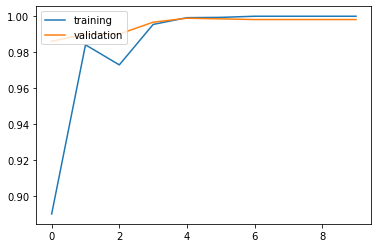

In [11]:
"""
train set과 valid set의 정확도를 그래프로 표현하는 코드로 그래프를 확인하면서 학습 횟수를 조절하고 모델을 수정하는 작업을 수행한다.
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

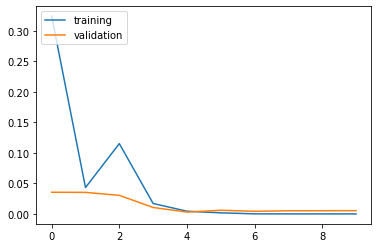

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [13]:
val_loss, val_acc = model.evaluate( X_test, y_test, verbose =2)

95/95 - 1s - loss: 0.0160 - accuracy: 0.9974


In [15]:
model.save('jebal.h5')